In [1]:
import cartopy.crs as ccrs
from cartopy import feature
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, colors
import fiona
from shapely.geometry import shape, MultiPolygon
import matplotlib.patches as mpatches
from metpy.calc import wind_components
from metpy.plots import StationPlot
import json

NameError: name 'lon' is not defined

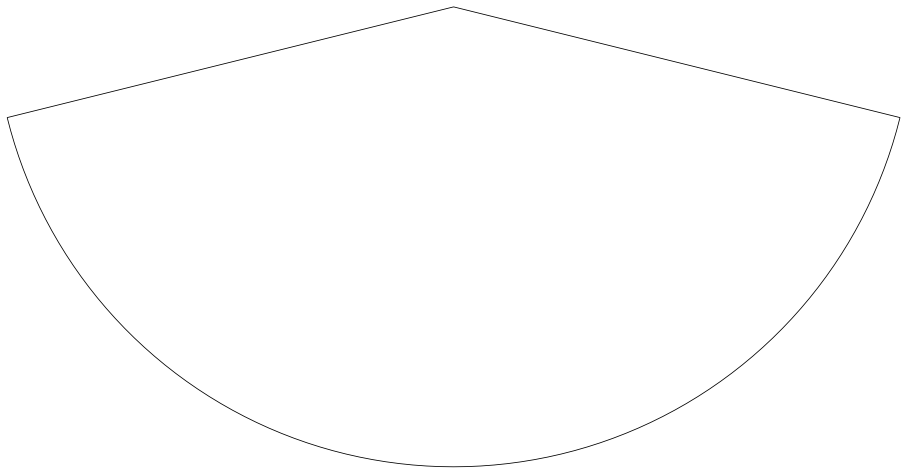

In [4]:
lccProjParams = { 'central_latitude'   : 25.0, # same as lat_0 in proj4 string 
                  'central_longitude'  : 265.0, # same as lon_0
                  'standard_parallels' : (25.0, 25.0) # same as (lat_1, lat_2)
}

proj = ccrs.LambertConformal(**lccProjParams)
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection=proj)
cbax = ax.contourf(lon, lat, sfcTdf, transform = ccrs.PlateCarree(), 
                     cmap=DEWPT_CMAP, norm=DEWPT_NORM, levels=DEWPT_LEVELS, extend='both')
ax.streamplot(lon, lat, sfcU, sfcV, transform = ccrs.PlateCarree(),
              linewidth = 1.5, density = 2, color = 'k')
ax.add_feature(feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none',
        edgecolor='black'))
ax.add_feature(feature.NaturalEarthFeature(
        category='physical',
        name='lakes',
        scale='50m',
        facecolor='none',
        edgecolor='black'))
ax.coastlines('50m')
ax.add_feature(feature.BORDERS)
ax.gridlines()
plt.title('Streamlines and Surface Dewpoint [$^\circ$F]')
plt.suptitle('RUC Analysis 120414 2100Z')
cb = plt.colorbar(cbax, ax = ax, label = 'TD$_{sfc}$ [$^{\circ}$F]')
cb.set_ticks(DEWPT_CBTIX)
plt.show()